In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Loading the dataset
df = pd.read_csv('/content/drive/My Drive/AirBnB_NYC_2019.csv')  # Adjust this path if needed



Dataset which is used in this assignement was taken from: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data/data

In [3]:
# Displaying basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
#Checking for missing values
df.isnull().sum()


,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [5]:
# Checking for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [6]:
# Converting data types
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [8]:
# Filling the missing reviews_per_month with 0
df['reviews_per_month'].fillna(0, inplace=True)

# Dropping the rows with missing name or host_name
df.dropna(subset=['name', 'host_name'], inplace=True)


<ipython-input-8-1884e92e7247>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


##  Data Cleaning

In this, we check for missing values, data types, and duplicates.  
We also clean the dataset  and ensuring consistency in key columns.


In [10]:
# Displaying first few rows for better understanding.
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
# Displaying last few rows
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,0.0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,0.0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,0.0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,0.0,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaT,0.0,1,23


In [12]:
# Basic statistics for numerical columns
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
                 id       host_id      latitude     longitude         price  \
count  4.885800e+04  4.885800e+04  48858.000000  48858.000000  48858.000000   
mean   1.902335e+07  6.763169e+07     40.728941    -73.952170    152.740309   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.475980e+06  7.818669e+06     40.690090    -73.983070     69.000000   
50%    1.969114e+07  3.079133e+07     40.723070    -73.955680    106.000000   
75%    2.915765e+07  1.074344e+08     40.763107    -73.936280    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   
std    1.098289e+07  7.862389e+07      0.054528      0.046159    240.232386   

       minimum_nights  number_of_reviews                    last_review  \
count    48858.000000       48858.000000                          38821   
mean         7.012444          23.273098  2018-10-04 07:23:47.072976128   
min          1.000000           0.000000  

## Descriptive Statistics

Basic statistical measures such as mean, median, standard deviation, and range  
to understand the overall distribution of variables like price, availability, and review count.


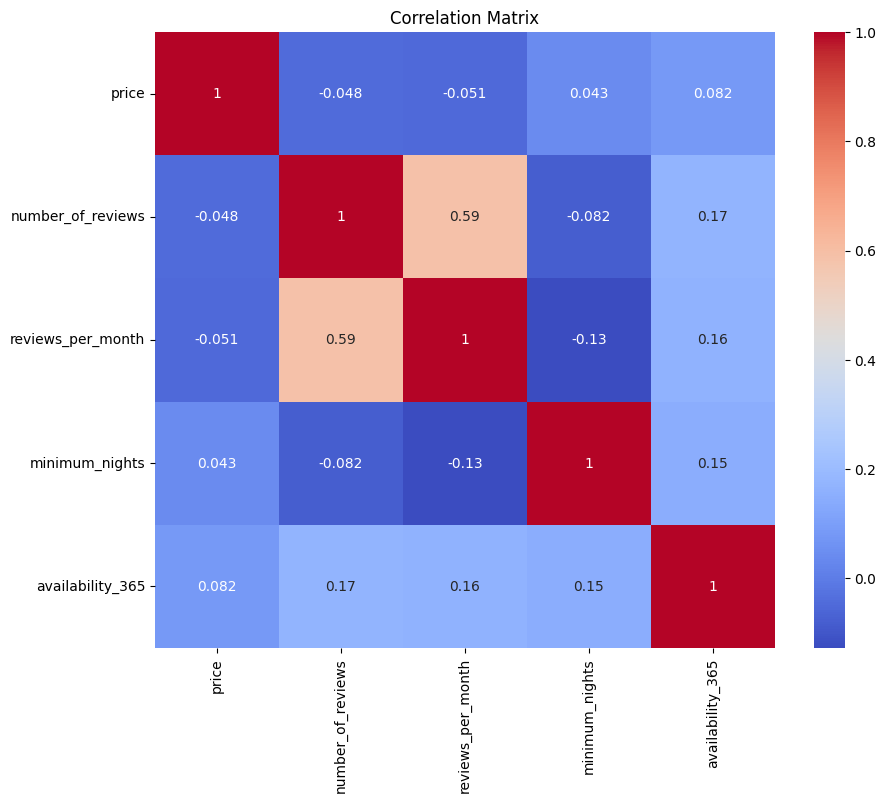

In [13]:
# 13. Correlation matrix heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[['price', 'number_of_reviews', 'reviews_per_month', 'minimum_nights', 'availability_365']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

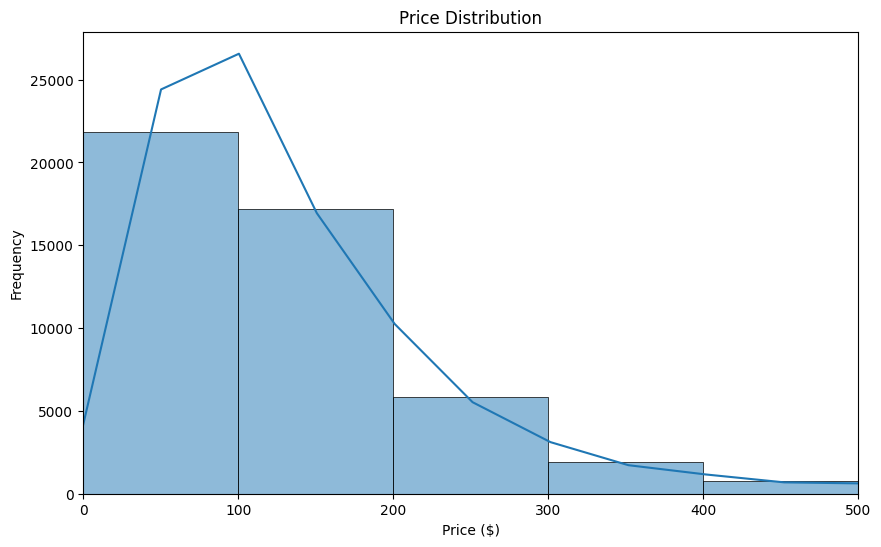

In [14]:
# # Histogram of Price distribution and this code is based on class lectures.
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=100, kde=True)
plt.title("Price Distribution")
plt.xlim(0, 500)
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

## Price Distribution

 Airbnb listing prices are distributed using histograms.
This helps identify outliers and common pricing tiers.


In [15]:
# Scatter Plot with Trendline: Price vs number of reviews and this code is based on week 5 class lecture
import plotly.express as px
fig = px.scatter(
    df,
    x='number_of_reviews',
    y='price',
    trendline='ols',
    trendline_color_override='red',
    title='Price vs Number of Reviews (with Trendline)',
    labels={
        'number_of_reviews': 'Number of Reviews',
        'price': 'Price ($)'
    }
)

fig.show()

## Price vs Number of Reviews

 Scatter plot is to explore the relationship between price and number of reviews.  
This helps identify whether higher-priced listings receive fewer or more reviews.


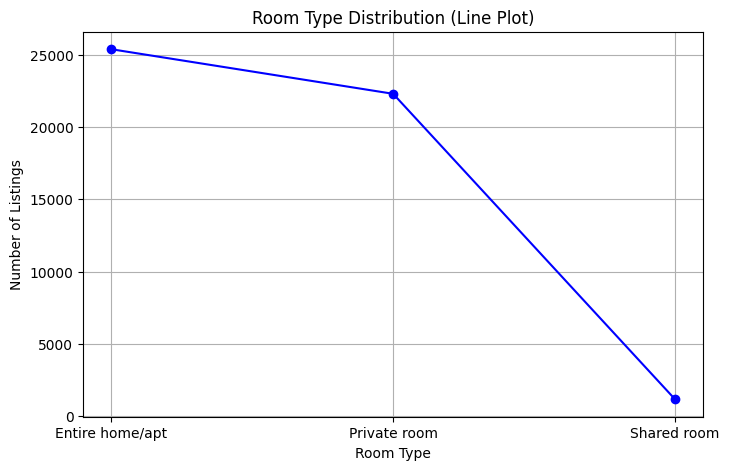

In [16]:
#  Line Plot showing Listings by room type and  this code based on  week 4 lecture which was taught in class
room_type_counts = df['room_type'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.plot(room_type_counts.index, room_type_counts.values, marker='o', linestyle='-', color='blue')
plt.title('Room Type Distribution (Line Plot)')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.show()

##  Line Plot – Room Type Distribution

This line plot shows the number of Airbnb listings for each room type (e.g., Entire home/apt, Private room, Shared room).  
It helps us visually compare which room types are most common.  

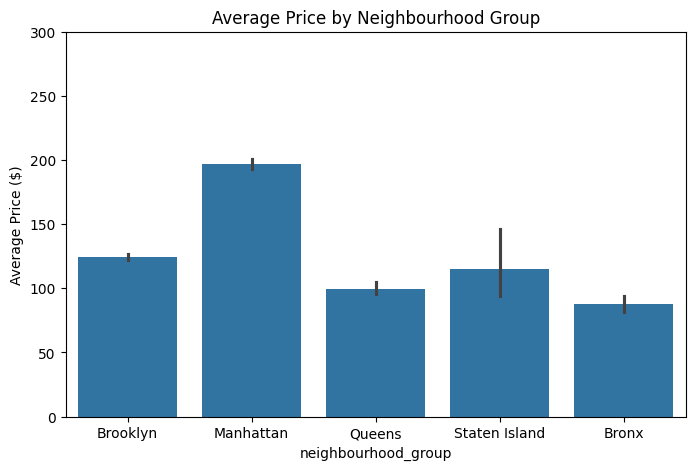

In [17]:
# Barplot Average price by Neighbourhood Group and code is based on lectures which was taught in class.
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='neighbourhood_group', y='price')
plt.title('Average Price by Neighbourhood Group')
plt.ylabel('Average Price ($)')
plt.ylim(0, 300)
plt.show()

## Bar Plot – Average Price by Neighbourhood Group

This bar plot displays the average price of Airbnb listings across different neighbourhood groups in New York City.  
It allows us to easily compare which areas tend to have higher or lower listing prices.  

In [40]:
# Saving and Downloading the cleaned dataset file
df.to_csv('cleaned_airbnb.csv', index=False)

from google.colab import files
files.download('cleaned_airbnb.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>